## Load Data 
After exploring two jigsaw datasets - one including unintended bias and one not - I will start off with the "easier" dataset. After finishing and deploying a model trained on that dataset, I will investigate the bias-dataset.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/jigsaw/train.csv')

## Explore Data

In [19]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [23]:
df.shape

(159571, 8)

In [18]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [17]:
print(df['comment_text'].str.len().describe())
df['comment_text'].str.split().str.len().mean()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64


np.float64(67.27352714465661)

<Axes: xlabel='toxic'>

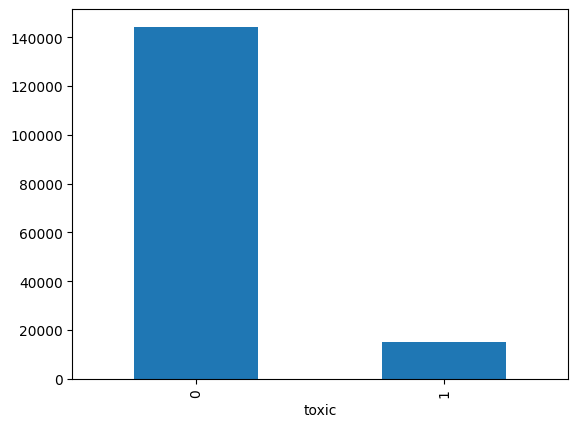

In [30]:
df['toxic'].value_counts().plot(kind='bar')

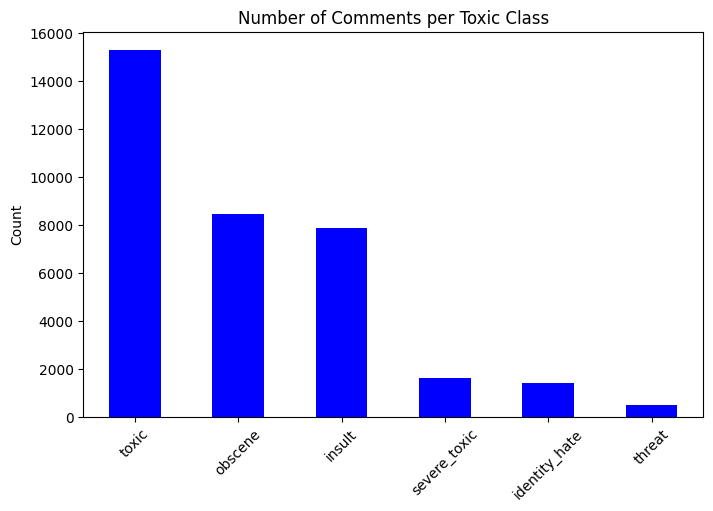

In [25]:

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

df[label_cols].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,5), color='blue')
plt.title("Number of Comments per Toxic Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [29]:
for label in label_cols:
    print(f"\n This is an example for label '{label}':\n")
    print(df[df[label] == 1]['comment_text'].iloc[0])


 This is an example for label 'toxic':

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

 This is an example for label 'severe_toxic':

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

 This is an example for label 'obscene':

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

 This is an example for label 'threat':

Hi! I am back again!
Last warning!
Stop undoing my edits or die!

 This is an example for label 'insult':

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

 This is an example for label 'identity_hate':

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and las

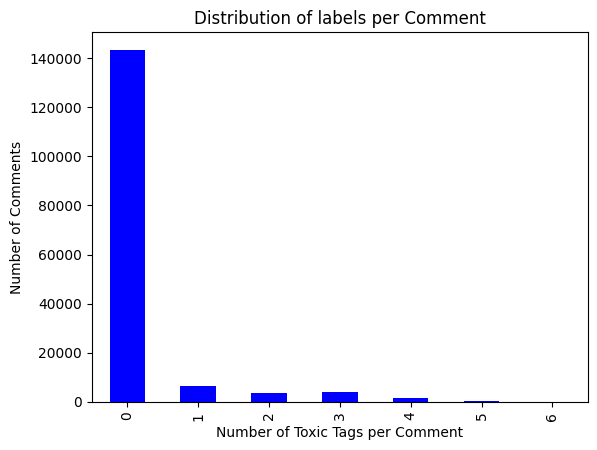

In [31]:
# From above, I learn that there can be multiple labels per comment

df['summed_labels'] = df[label_cols].sum(axis=1)

df['summed_labels'].value_counts().sort_index().plot(kind='bar', color='b')
plt.title("Distribution of labels per Comment")
plt.xlabel("Number of Toxic Tags per Comment")
plt.ylabel("Number of Comments")
plt.show()

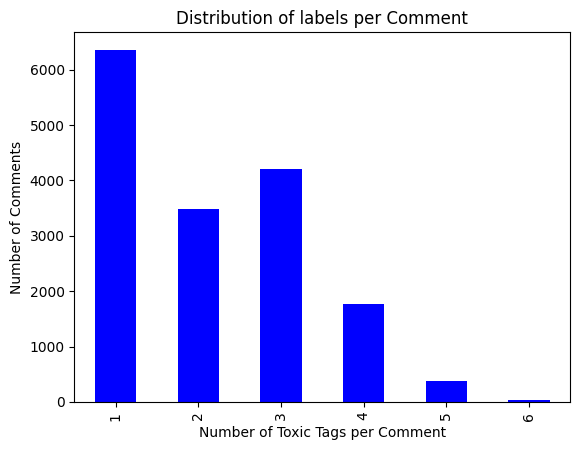

In [33]:
df[df['summed_labels']>0]['summed_labels'].value_counts().sort_index().plot(kind='bar', color='b')
plt.title("Distribution of labels per Comment")
plt.xlabel("Number of Toxic Tags per Comment")
plt.ylabel("Number of Comments")
plt.show()

In [34]:
df.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
summed_labels    False
dtype: bool

To sum up - this dataset has 6 different toxicity labels. Most of the comments are classified as not toxic. If they are considered toxic, the majority has more than 1 label